## Observations and Insights 

In [225]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudy_complete = pd.merge(mouse_metadata , study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouseStudy_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [226]:
# count the number of rows in combine file
cnt_rows = len(mouseStudy_complete)
pd.DataFrame({"Row Count": [cnt_rows]}) 

,Row Count
0,1893


In [227]:
# Checking the number of mice.
nbr_mices=len(mouseStudy_complete["Mouse ID"].unique())

pd.DataFrame({"Total Number of Mices": [nbr_mices]})

,Total Number of Mices
0,249


In [228]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_MiceID=mouseStudy_complete[mouseStudy_complete.duplicated(["Mouse ID", "Timepoint"])]
print(dupes_MiceID.index)


Int64Index([909, 911, 913, 915, 917], dtype='int64')


In [229]:
# Optional: Get all the data for the duplicate mouse ID. 
dfMouseID =pd.DataFrame(mouseStudy_complete, columns=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)",
                                                                "Timepoint","Tumor Volume (mm3)","Metastatic Sites"])

dupMouseID = dfMouseID[dfMouseID.duplicated(["Mouse ID", "Timepoint"])]   
dupMouseID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [230]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_Mice_df = mouseStudy_complete.drop(dupMouseID.index)
new_Mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [231]:
cnt_newRows = len(new_Mice_df)
pd.DataFrame({"Row Count": [cnt_newRows]}) 

,Row Count
0,1888


In [232]:
# Checking the number of mice in the clean DataFrame.
new_nbr_mices=len(new_Mice_df["Mouse ID"].unique())

pd.DataFrame({"Total Number of Mices": [new_nbr_mices]})

,Total Number of Mices
0,249


## Summary Statistics

In [233]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Sumry_Status_Cnt = new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
Sumry_Status_Mean= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Sumry_Status_Median= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Sumry_Status_Variance= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Sumry_Status_STD= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Sumry_Status_SEM= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble into DataFrame
summary_stat = pd.DataFrame({
                             "Mean": Sumry_Status_Mean,
                             "Median": Sumry_Status_Median,
                             "Variance": Sumry_Status_Variance,
                             "Standard Deviation": Sumry_Status_STD,
                             "SEM": Sumry_Status_SEM
                            
                            })

type_summary = summary_stat[["Mean", 
                             "Median",
                             "Variance",
                             "Standard Deviation",
                             "SEM"]]


# Display results
type_summary.round(3)




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [234]:
Sumry_Status = new_Mice_df.groupby(["Drug Regimen"]).count()
Sumry_Status["Volume"] = new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
Sumry_Status["Mean"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Sumry_Status["Median"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Sumry_Status["Variance"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Sumry_Status["Standard Deviation"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Sumry_Status["SEM"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
Summary_Statistics = Sumry_Status[["Mean","Median","Variance","Standard Deviation","SEM"]].round(2)
Summary_Statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [235]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggSummary =  new_Mice_df.groupby("Drug Regimen", as_index=True).agg(
        Mean = ('Tumor Volume (mm3)',np.mean),
        Median = ('Tumor Volume (mm3)',np.median),
        Variance = ('Tumor Volume (mm3)',np.var),
        StandardDeviation = ('Tumor Volume (mm3)',np.std),
        SEM = ('Tumor Volume (mm3)',st.sem)       
)

aggSummary.rename(columns={"StandardDeviation": "Standard Deviation"}).round(2)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

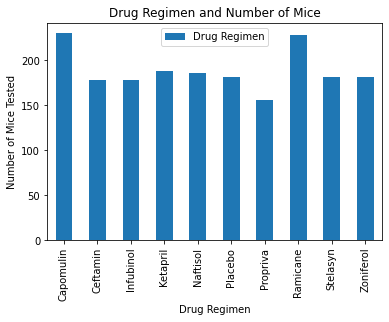

In [236]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Uniq tests 
DrugName= new_Mice_df.groupby(["Drug Regimen"])
MouseCount= pd.DataFrame(DrugName["Drug Regimen"].count())

# Create a bar chart 
count_chart = MouseCount.plot(kind='bar')

# Set the xlabel and ylabel 
count_chart.set_title("Drug Regimen and Number of Mice")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice Tested")
# show graph
plt.show()

In [237]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(MouseCount))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

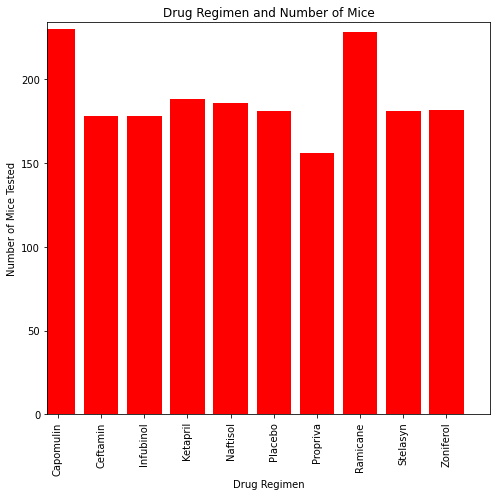

In [238]:

tick_locations = [value for value in x_axis]
plt.figure(figsize=(7,7))
plt.bar(x_axis, MouseCount["Drug Regimen"] , color="r", align="center")

plt.xticks(tick_locations, list(MouseCount.index),rotation="vertical")      
# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(MouseCount["Drug Regimen"])+4)

# Give the chart a title, x label, and y label
plt.title("Drug Regimen and Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()


Sex
Female    930
Male      958
Name: Sex, dtype: int64
1888


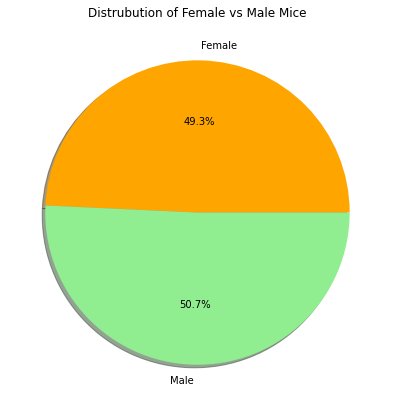

In [239]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df=new_Mice_df.groupby(["Sex"])
sex_cnt = sex_df["Sex"].count()
total = sex_cnt.sum()
print(sex_cnt)
print(total)
count_chart = sex_cnt.plot(kind='pie',
                           title ="Distrubution of Female vs Male Mice",
                           autopct='%1.1f%%',
                           colors =["orange","lightgreen"],
                           figsize=(7,7),
                           label="",
                           shadow=True
                          )

plt.show()

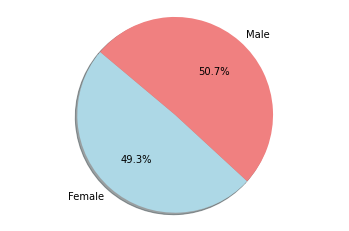

In [240]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= list(sex_cnt.index.values)
colors = ["lightblue", "lightcoral"]
plt.pie(sex_cnt, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [241]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get only certain fields
tumorVol_df = new_Mice_df.loc[:, ["Mouse ID","Drug Regimen", "Timepoint", "Tumor Volume (mm3)","Weight (g)"]]
# Get data only in the treatment Regimens
TreatRegimensList = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
new_tumor_df = tumorVol_df[tumorVol_df ['Drug Regimen'].isin(TreatRegimensList)]


In [242]:
# Start by getting the last (greatest) timepoint for each mouse
greatestTimePt = new_tumor_df.groupby("Mouse ID").count()
greatestTimePt["Timepoint"] = new_Mice_df.groupby("Mouse ID")["Timepoint"].last()
MouseIDLastTimePoint= greatestTimePt[["Timepoint"]]
MouseIDLastTimePoint.head()



,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [243]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(new_tumor_df , MouseIDLastTimePoint, how="inner", on=["Mouse ID","Timepoint"] )
tumor_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
0,k403,Ramicane,45,22.050126,16
1,s185,Capomulin,45,23.343598,17
2,x401,Capomulin,45,28.484033,15
3,m601,Capomulin,45,28.430964,17
4,g791,Ramicane,45,29.128472,16


In [244]:
pv_tumor_df = tumor_df.pivot_table(values='Tumor Volume (mm3)', index="Mouse ID", columns='Drug Regimen')
pv_tumor_df.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,
a203,NaN,NaN,67.973419,NaN
a251,NaN,NaN,65.525743,NaN
a275,NaN,62.999356,NaN,NaN
a411,NaN,NaN,NaN,38.407618
a444,NaN,NaN,NaN,43.047543


In [245]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

# set count to 0
cnt=0

# Loop throught the 4 treatements Regimens created as a list
for treatments in TreatRegimensList:

    # calc iqr and potential outliers of each treatment
    quartiles = pv_tumor_df[treatments].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"******************************")
    print(f"{treatments} IQR data is:")
    print(f"The lower quartile of treatments is: {lowerq}")
    print(f"The upper quartile of treatments is: {upperq}")
    print(f"The interquartile range of treatments is: {iqr}")
    print(f"The the median of treatments is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    cnt += 1

******************************
Capomulin IQR data is:
The lower quartile of treatments is: 32.37735684
The upper quartile of treatments is: 40.1592203
The interquartile range of treatments is: 7.781863460000004
The the median of treatments is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
******************************
Ramicane IQR data is:
The lower quartile of treatments is: 31.56046955
The upper quartile of treatments is: 40.65900627
The interquartile range of treatments is: 9.098536719999998
The the median of treatments is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
******************************
Infubinol IQR data is:
The lower quartile of treatments is: 54.04860769
The upper quartile of treatments is: 65.52574285
The interquartile range of treatments is: 11.477135160000003
The the median of treatments is: 60.16518046 
Values below 36.83290494999999 

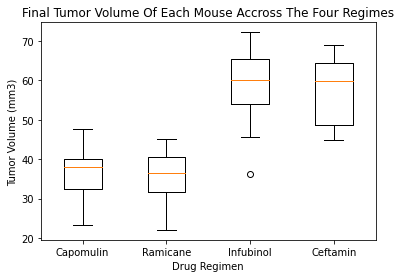

In [246]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# create a empty lis box 
boxplot_list = []


for treatments in TreatRegimensList:   
# append data to list
    boxplot_list.append(list(pv_tumor_df[treatments].dropna()))

# boxplot 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Of Each Mouse Accross The Four Regimes')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(boxplot_list)
plt.xticks([1,2,3,4],TreatRegimensList )
plt.show()

## Line and Scatter Plots

In [247]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = tumor_df.loc[tumor_df['Drug Regimen'] == 'Capomulin']
Capomulin.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
1,s185,Capomulin,45,23.343598,17
2,x401,Capomulin,45,28.484033,15
3,m601,Capomulin,45,28.430964,17
6,f966,Capomulin,20,30.485985,17
10,u364,Capomulin,45,31.023923,17


In [248]:
agg_tumorVol_TimePt =  Capomulin.groupby("Timepoint", as_index=True).agg(
        Mean = ('Tumor Volume (mm3)',np.mean)
)
agg_tumorVol_TimePt

,Mean
Timepoint,
10,39.952347
15,46.539206
20,30.485985
35,38.753265
45,36.236114


In [ ]:
# Need to set the line graph

In [ ]:
Capomulin = plt.plot(x_axis,y_axis, color="red", label="Capomulin")
plt.title("Tumor Volume vs. Time Point For A Mouse Treated With Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

In [250]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgtumorVol_mousewt =  Capomulin.groupby("Mouse ID", as_index=True).agg(
        Avg_Tumor_Vol = ('Tumor Volume (mm3)',np.mean),
        Avg_Wt_Mouse = ('Weight (g)',np.mean)
)
avgtumorVol_mousewt.head()

,Avg_Tumor_Vol,Avg_Wt_Mouse
Mouse ID,,
b128,38.982878,22
b742,38.939633,21
f966,30.485985,17
g288,37.074024,19
g316,40.159220,22


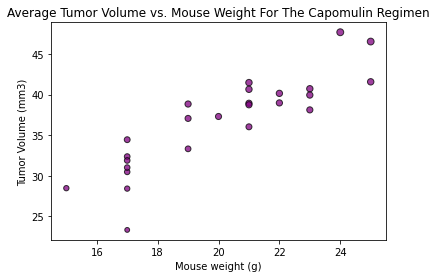

In [254]:
plt.scatter(
    avgtumorVol_mousewt['Avg_Wt_Mouse'],
    avgtumorVol_mousewt['Avg_Tumor_Vol'],
    marker="o", facecolors="purple", edgecolors="black",
    s=avgtumorVol_mousewt['Avg_Tumor_Vol'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Average Tumor Volume vs. Mouse Weight For The Capomulin Regimen")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [252]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation =st.pearsonr(avgtumorVol_mousewt['Avg_Wt_Mouse'],avgtumorVol_mousewt['Avg_Tumor_Vol'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


The r-squared is: 0.7686134812139006


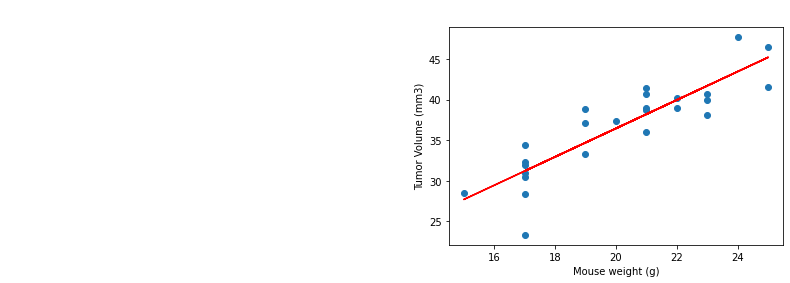

In [253]:
# Liner regresssion model
x_values = avgtumorVol_mousewt['Avg_Wt_Mouse']
y_values = avgtumorVol_mousewt['Avg_Tumor_Vol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()